# Sumowanie liczb pojedynczej precyzji
1. Napisz program, który oblicza sumę N liczb pojedynczej precyzji przechowywanych
w tablicy o N = 10^7 elementach. Tablica wypełniona jest tą samą wartością v z
przedziału [0.1, 0.9] np. v = 0.53125.
2. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak
duży?

In [10]:
import numpy as np
import time

# v = 0.53125
v = np.float32(0.2137420)
N = 10**7


start = time.time()
tab = [v for i in range(N)]

suma = 0
for i in range(N):
    suma += tab[i]

stop = time.time()
print('sumowanie pythonowe',suma)
print('blad bezwzgledny: ', np.abs(suma - N*v))
print('blad wzgledny: ', np.abs(suma - N*v)/np.abs(N*v))
print('czas: ', stop-start)

print('-----------------------------------')

start = time.time()
suma2 = np.sum(tab)
stop = time.time()
print('sumowanie numpy',suma2)
print('blad bezwzgledny: ', np.abs(suma2 - N*v))
print('blad wzgledny: ', np.abs(suma2 - N*v)/np.abs(N*v))
print('czas: ', stop-start)



sumowanie pythonowe 2245937.0
blad bezwzgledny:  108517.0
blad wzgledny:  0.05077009
czas:  1.9953358173370361
-----------------------------------
sumowanie numpy 2137442.2
blad bezwzgledny:  22.25
blad wzgledny:  1.0409746e-05
czas:  0.3473336696624756


3. W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (ra-
 portuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.

Text(0, 0.5, 'Błąd względny')

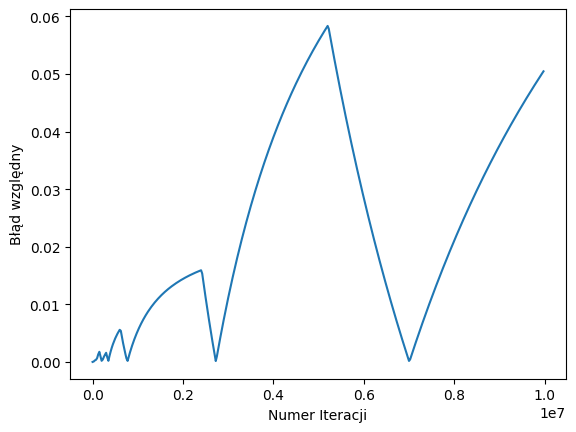

In [11]:
import matplotlib.pyplot as plt
suma = 0
cnt = []
b_wzgl = []
for i in range(N):
    suma += tab[i]
    if i % 25000 == 0:
        cnt.append(i+1)
        b_wzgl.append(np.abs(suma - (i+1)*v)/np.abs((i+1)*v))
    
fig, ax = plt.subplots()
ax.plot(cnt,b_wzgl)
ax.set_xlabel("Numer Iteracji")
ax.set_ylabel("Błąd względny")



4. Zaimplementuj rekurencyjny algorytm sumowania
5. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie
zmalał?

In [17]:
def rek_sum(tab,n,i,j):
    if (j-i) == 1:
        return tab[i]
    else:
        return np.float32(rek_sum(tab,n,i,(i+j)//2)) + np.float32(rek_sum(tab,n,(i+j)//2,j))

start = time.time()
suma_rek = rek_sum(tab,N,0,N)
stop = time.time()
czas_rek = stop - start

print('sumowanie rekurencyjne',suma_rek)
print('blad bezwzgledny: ', np.abs(suma_rek - N*v))
print('blad wzgledny: ', np.abs(suma_rek - N*v)/np.abs(N*v))
print('czas: ', czas_rek)


sumowanie rekurencyjne 2137420.2
blad bezwzgledny:  0.25
blad wzgledny:  1.1696344e-07
czas:  11.431401252746582


# Zadanie 2 Algoryrm Kahana

In [13]:
def kahan_algo(tab):
    sum_k = np.float32(0.0)
    err = np.float32(0.0)
    for i in range(len(tab)):
        y = np.float32(tab[i] - err)
        tmp = np.float32(sum_k + y)
        err = np.float32((tmp - sum_k) - y)
        sum_k = tmp
    return sum_k

1. Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejścio-
 wych jak w przypadku testów z Zadania 1.

3. Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekuren-
cyjnego dla tych samych danych wejściowych.

In [16]:
start = time.time()
suma_kahan = kahan_algo(tab)
stop = time.time()
czas_kahan = stop - start

print("suma", suma_kahan)
print("blad bezwzgledny", np.abs(suma_kahan - N*v))
print("blad wzgledny", np.abs(suma_kahan - N*v)/np.abs(N*v))
print("czas", czas_kahan)

suma 2137420.0
blad bezwzgledny 0.0
blad wzgledny 0.0
czas 6.04313325881958


2. Wyjaśnij dlaczego w algorytm Kahana ma znacznie lepsze własności numeryczne?
Do czego służy zmienna err?

Kahan ma lepsze własności numeryczne bo oblicza bład zaokrąglenia i odejmuje go od następnego elementu

# Zadanie 3 Sumy częściowe

In [19]:
def zetaRiemana(s,n, dtype, forward):
    suma_zeta = dtype(0.0)
    if forward:
        for k in range(1,n+1):
            suma_zeta += dtype(1/pow(k,s))
    else:
        for k in range(n, 0, -1):
            suma_zeta += dtype(1/pow(k,s))
    return suma_zeta
            

def etaDirich(s,n, dtype, forward):
    suma_eta = dtype(0.0)
    if forward:
        for k in range(1,n+1):
            suma_eta += dtype(pow(-1,k-1)/pow(k,s))
    else:
        for k in range(n,0,-1):
            suma_eta += dtype(pow(-1,k-1)/pow(k,s))
    return suma_eta
        

Dla s = 2, 3.6667, 5, 7.2, 10 oraz n = 50, 100, 200, 500, 1000 oblicz wartości funkcji ζ(s)
i η(s) w pojedynczej precyzji sumując w przód, a następnie wstecz. Porównaj wyniki
z rezultatami uzyskanymi dla podwójnej precyzji. Dokonaj interpretacji otrzymanych
wyników.

In [25]:
s_values = [2, 3.6667, 5, 7.2, 10]
n_values = [50,100,200,500,1000]

results = []

for s in s_values:
    for n in n_values:
        
        zeta_f_1 = zetaRiemana(np.float32(s),n,np.float32,True)
        zeta_b_1 = zetaRiemana(np.float32(s),n,np.float32,False)
        zeta_f_2 = zetaRiemana(np.float64(s),n,np.float64,True)
        zeta_b_2 = zetaRiemana(np.float64(s),n,np.float64,False)
        
        eta_f_1 = etaDirich(np.float32(s), n, np.float32,True)
        eta_b_1 = etaDirich(np.float32(s), n, np.float32,False)
        eta_f_2 = etaDirich(np.float64(s), n, np.float64,True)
        eta_b_2 = etaDirich(np.float64(s), n, np.float64,False)
        
        results.append({
            's': s,
            'n': n,
            'zeta':{
                'f_1': zeta_f_1,
                'b_1': zeta_b_1,
                'f_2': zeta_f_2,
                'b_2': zeta_b_2
            },
            'eta':{
                'f_1': eta_f_1,
                'b_1': eta_b_1,
                'f_2': eta_f_2,
                'b_2': eta_b_2
            }
        })

for res in results:
    s = res['s']
    n = res['n']
    zeta = res['zeta']
    eta = res['eta']
    print(f"\ns = {s}, n = {n}")
    z_f_1 = zeta['f_1']
    z_b_1 = zeta['b_1']
    z_f_2 = zeta['f_2']
    z_b_2 = zeta['b_2']
    
    e_f_1 = eta['f_1']
    e_b_1 = eta['b_1']
    e_f_2 = eta['f_2']
    e_b_2 = eta['b_2']
    
    print("Zeta")
    print("Single Forward", z_f_1)
    print("Single Backward", z_b_1)
    print("Double Forward", z_f_2)
    print("Double Backward", z_b_2)
    
    print("Eta")
    print("Single Forward", e_f_1)
    print("Single Backward", e_b_1)
    print("Double Forward", e_f_2)
    print("Double Backward", e_b_2)
    
    


s = 2, n = 50
Zeta
Single Forward 1.6251329
Single Backward 1.6251327
Double Forward 1.625132733621529
Double Backward 1.6251327336215293
Eta
Single Forward 0.822271
Single Backward 0.82227105
Double Forward 0.8222710318260295
Double Backward 0.8222710318260289

s = 2, n = 100
Zeta
Single Forward 1.634984
Single Backward 1.6349839
Double Forward 1.6349839001848923
Double Backward 1.634983900184893
Eta
Single Forward 0.8224175
Single Backward 0.8224175
Double Forward 0.8224175333741286
Double Backward 0.8224175333741282

s = 2, n = 200
Zeta
Single Forward 1.6399467
Single Backward 1.6399465
Double Forward 1.6399465460149971
Double Backward 1.6399465460149973
Eta
Single Forward 0.8224547
Single Backward 0.8224546
Double Forward 0.822454595922551
Double Backward 0.8224545959225509

s = 2, n = 500
Zeta
Single Forward 1.642936
Single Backward 1.642936
Double Forward 1.642936065514894
Double Backward 1.6429360655148941
Eta
Single Forward 0.82246536
Single Backward 0.82246506
Double Forward 